In [4]:
import pandas as pd


url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)


df = df.drop(columns=['timestamp'])


df.head()


,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [5]:
import numpy as np


num_users = df['user_id'].nunique()
num_items = df['movie_id'].nunique()
user_item_matrix = np.zeros((num_users, num_items))

for line in df.itertuples():
    user_item_matrix[line[1]-1, line[2]-1] = line[3]


user_item_matrix.shape


(943, 1682)

In [11]:
import numpy as np

def fast_matrix_factorization(R, K=50, steps=2000, alpha=0.0002, beta=0.02, tol=0.001):
    """
    Faster matrix factorization using NumPy vectorization.
    R: user-item rating matrix (2D NumPy array)
    K: number of latent features
    steps: number of training iterations
    alpha: learning rate
    beta: regularization parameter
    tol: convergence threshold
    """
    num_users, num_items = R.shape
    P = np.random.rand(num_users, K)
    Q = np.random.rand(num_items, K)

    
    mask = R > 0

    for step in range(steps):
        prediction = P @ Q.T
        error = R - prediction
        error[~mask] = 0  

        P_grad = -2 * error @ Q + beta * P
        Q_grad = -2 * error.T @ P + beta * Q

        P -= alpha * P_grad
        Q -= alpha * Q_grad

        loss = np.sum(error[mask] ** 2) + beta/2 * (np.sum(P**2) + np.sum(Q**2))
        if step % 100 == 0:
            print(f"Step {step}, Loss: {loss:.4f}")
        if loss < tol:
            break

    return P, Q


In [12]:
K = 50
P, Q = fast_matrix_factorization(user_item_matrix, K)

Step 0, Loss: 8242077.5813
Step 100, Loss: 69158.0811
Step 200, Loss: 47892.9933
Step 300, Loss: 36173.2748
Step 400, Loss: 29246.2662
Step 500, Loss: 24819.1813
Step 600, Loss: 21773.8719
Step 700, Loss: 19557.3585
Step 800, Loss: 17873.6748
Step 900, Loss: 16551.6214
Step 1000, Loss: 15485.8345
Step 1100, Loss: 14608.0529
Step 1200, Loss: 13872.1037
Step 1300, Loss: 13245.6320
Step 1400, Loss: 12705.3120
Step 1500, Loss: 12233.9376
Step 1600, Loss: 11818.5760
Step 1700, Loss: 11449.3505
Step 1800, Loss: 11118.6102
Step 1900, Loss: 10820.3492


In [14]:
predicted_ratings = np.dot(P, Q.T)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


predicted_ratings = np.dot(P, Q.T)


mask = user_item_matrix > 0


true_ratings = user_item_matrix[mask]
pred_ratings = predicted_ratings[mask]


rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings))
mae = mean_absolute_error(true_ratings, pred_ratings)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')


RMSE: 0.3205
MAE: 0.2339


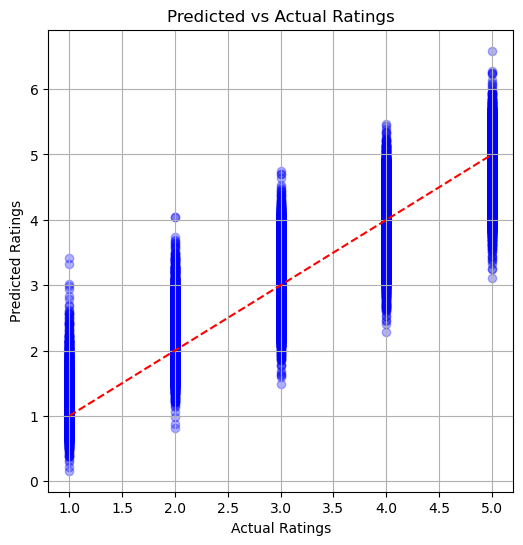

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(true_ratings, pred_ratings, alpha=0.3, color='blue')
plt.plot([1, 5], [1, 5], color='red', linestyle='--')  # ideal line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs Actual Ratings")
plt.grid(True)
plt.show()
